In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import tensorflow as tf

import sys
sys.path.append('src/')
from squeezenet import SqueezeNet

import matplotlib.pyplot as plt
%matplotlib inline

# Train

In [3]:
weights = np.load('weights.npy')[()]
# delete the last layer
del weights['classifier/conv10/kernel:0']
del weights['classifier/conv10/bias:0']

In [8]:
model = SqueezeNet(tf.train.AdamOptimizer(1e-3), weight_decay=None, image_size=299, num_classes=256)

In [9]:
%%time
losses, _ = model.fit(
    0, '/home/ubuntu/data/val.tfrecords', '/home/ubuntu/data/val.tfrecords', steps_per_epoch=400,
    batch_size=64, num_epochs=10, validation_steps=80, patience=10, 
    initial_weights=weights
)

1.00  3.663 2.019 0.335 0.561  48.607
2.00  0.915 0.358 0.783 0.907  50.566
3.00  0.216 0.152 0.943 0.955  50.811
4.00  0.087 0.078 0.978 0.979  51.694
5.00  0.063 0.022 0.984 0.995  52.021
6.00  0.036 0.016 0.991 0.996  51.984
7.00  0.057 0.028 0.985 0.993  52.460
8.00  0.068 0.046 0.981 0.987  52.580
9.00  0.043 0.007 0.989 0.999  51.754
10.00  0.029 0.022 0.993 0.994  52.617
CPU times: user 13min 27s, sys: 7min 46s, total: 21min 14s
Wall time: 8min 35s


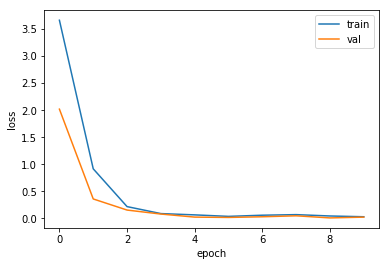

In [15]:
plt.plot([x[0] for x in losses], label='train');
plt.plot([x[1] for x in losses], label='val');
plt.legend();
plt.xlabel('epoch');
plt.ylabel('loss');

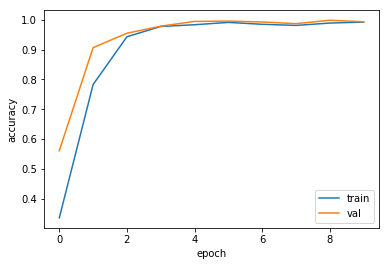

In [16]:
plt.plot([x[2] for x in losses], label='train');
plt.plot([x[3] for x in losses], label='val');
plt.legend();
plt.xlabel('epoch');
plt.ylabel('accuracy');